<a href="https://colab.research.google.com/github/SAVCHink2042/ML-algorithm/blob/main/binary_class%2Broc_curve(recall_precision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Бинарная классификация через метод опорных векторов, Recall, Rrecision, ROC-curve, AUC.

Датасет отсюда: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_auc_score

data = pd.read_csv("binary_class.csv")

data.iloc[:,-1]= data.iloc[:,-1].replace(0, -1)
print(data)

matrix = data.iloc[:, :9]
target = data.iloc[:, 9]

x_train, x_test, y_train, y_test  = train_test_split(matrix,target, test_size = 0.25 )

model = svm.SVC(kernel ='linear')
model.fit(x_train, y_train )

print(model.coef_[0] )
print(model.intercept_[0] )


TP = 0
FN = 0
FP = 0
for i in range( len(x_test) ):
    prediction = model.predict(x_test.iloc[[i]])[0]
    if prediction == 1 and y_test.iloc[i] == 1 :
        TP += 1
    elif prediction == -1 and y_test.iloc[i] == 1:
        FN += 1
    elif prediction == 1 and y_test.iloc[i] == -1:
        FP += 1

print( "precision: ", TP/(TP+FN ) )
print( "recall: ", TP/(TP+FP) )

     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0           0         7   7    1   6    6  36   3            1     1
1         190         1   3    3   5    1  20   4            1    -1
2          31         7   2    2   6    1  24   6            1    -1
3          83         4   3    4   5    1  28   6            1    -1
4         640         7   5    6   4    0  68   6            1    -1
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1

[944 rows x 10 columns]
[-3.95540972e-04  2.31595839e-03  2.50362432e-01 -4.16863858e-01
 -1.11695450e-01  6.75809514e-01  4.48843029e-03 -3.88687448e-02
  2.50302206e-02]

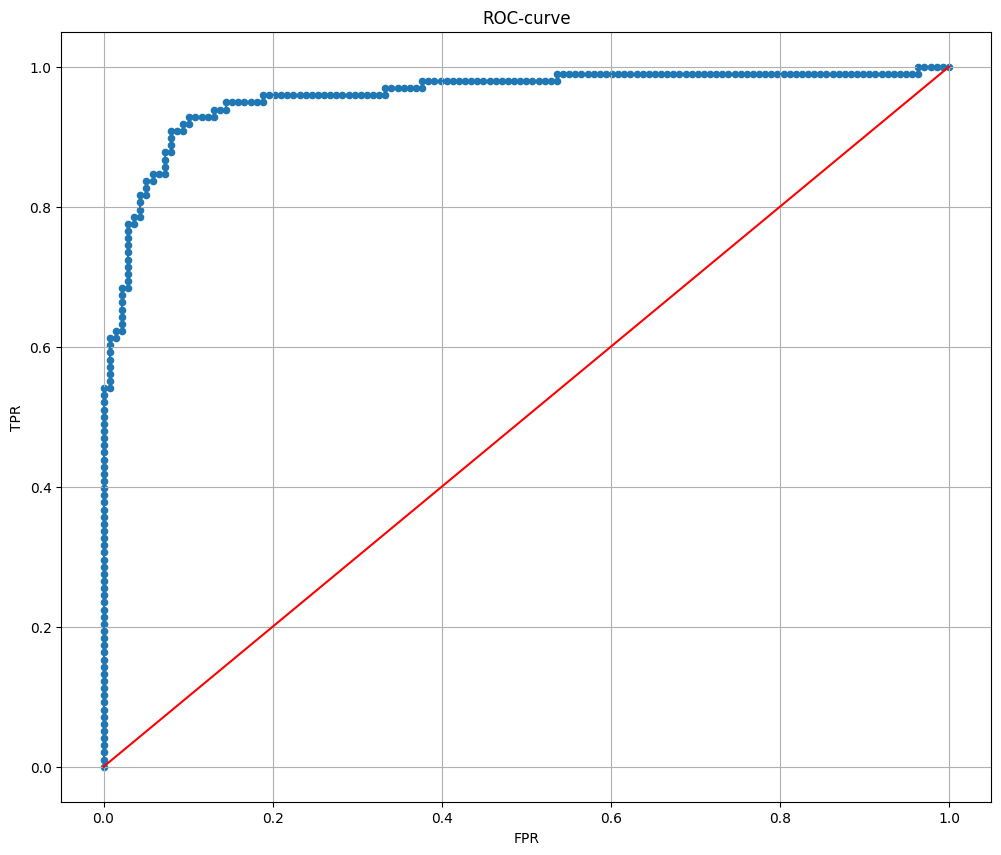

ВНИМАНИЕ ПОКАЗАТЕЛЬ AUC: 0.9580745341614907
ДАТАСЕТ: 
3.0663625952318143 1
3.003540965992079 1
2.980767324214144 1
2.963548171841206 1
2.960405551859028 1
2.9423379497618023 1
2.884243749108814 1
2.8805251958998945 1
2.8573529726324858 1
2.8374646312475407 1
2.7957329694359534 1
2.734841251143673 1
2.705756059460898 1
2.673862466311754 1
2.6673714859832853 1
2.544283506888011 1
2.5361378058764577 1
2.488740277522361 1
2.4872174990183535 1
2.4710373043969107 1
2.4631610127609 1
2.457956498662782 1
2.4553780670223415 1
2.4203354197460247 1
2.415581111673261 1
2.415256648603759 1
2.380867870048022 1
2.369080056235385 1
2.3437456347191135 1
2.316917935324201 1
2.2956775145788435 1
2.293250927294381 1
2.2356486981358654 1
2.2329778473074122 1
2.222352203284338 1
2.1776738968688254 1
2.12971722348771 1
2.1240961422627014 1
2.064471037575475 1
1.9728725495639972 1
1.943482483571215 1
1.934786600193617 1
1.9060361154250658 1
1.8894685766552688 1
1.8538774775561238 1
1.834591780367934 1
1.81936

In [22]:
import numpy as np
from sklearn.metrics import auc
massiv = [ [np.dot(x_test.iloc[i], model.coef_[0] ) + model.intercept_[0], y_test.iloc[i]]       for i in range(len(x_test))   ]
massiv.sort(key = lambda x: -x[0] )


x = [0]
y = [0]
FP = TP = N = P = 0

for el in massiv:
    if el[1] == 1:
        P+=1
    else:
        N+=1

for el in  massiv:
    if  el[1] > 0:
        TP +=1
    else :
        FP +=1
    x.append( FP / (N) )
    y.append( TP / (P) )

plt.figure(figsize =(12, 10 ))
plt.scatter(x, y, s = 20)
plt.plot(x, y)
otrezok = np.linspace(0,1, 2)
plt.plot( otrezok, otrezok, color='red', )
plt.title('ROC-curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()
auc = auc(x, y)
print("ВНИМАНИЕ ПОКАЗАТЕЛЬ AUC:", auc)

print("ДАТАСЕТ: ")
for i in range(len(massiv)):
    print(massiv[i][0], massiv[i][1])
